In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data_path='Bike-Sharing_hour_data.csv'
rides=pd.read_csv(data_path)

In [24]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
rides.shape

(17379, 17)

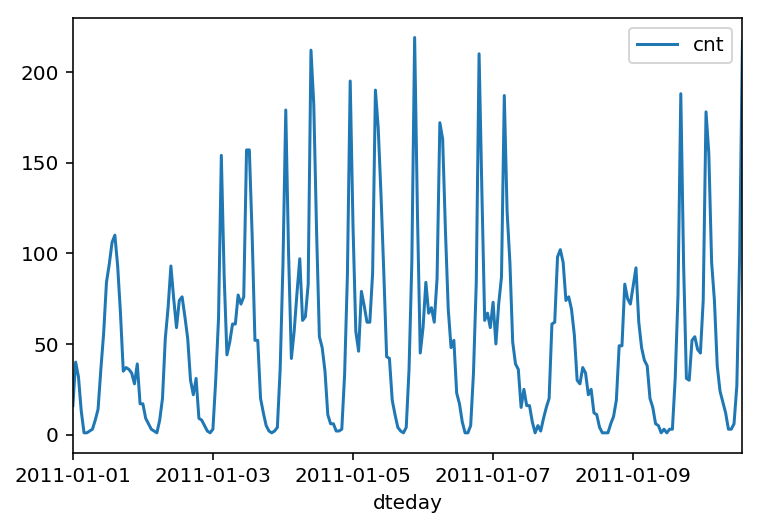

In [26]:
rides[:24*10].plot(x='dteday',y='cnt')
plt.show()

In [27]:
#removing dummy variables
dummy_fields=['season','weathersit','mnth','hr','weekday']
for each in dummy_fields:
    dummies=pd.get_dummies(rides[each],prefix=each,drop_first=False)
    rides=pd.concat([rides,dummies],axis=1)
    
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()   

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
quant_features=['casual','registered','cnt','temp','hum','windspeed']
scaled_feature={}
for each in quant_features:
    mean,std=data[each].mean(),data[each].std()
    scaled_feature[each]=[mean, std]
    data.loc[:,each]=(data[each]-mean)/std

In [29]:
scaled_feature

{'casual': [35.67621842453536, 49.305030387053186],
 'registered': [153.78686920996606, 151.35728591258317],
 'cnt': [189.46308763450142, 181.38759909186527],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

In [30]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#since time sampled data , we can't use train_test_split directly
test_data=data[-21*24:]
test_data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
16875,1,0,0.015647,0.999178,0.276298,-0.500481,-0.256260,-0.349876,0,0,...,0,1,0,0,1,0,0,0,0,0
16876,1,0,-0.192085,1.310171,0.519881,-0.561326,-0.513929,-0.581424,0,0,...,0,0,1,0,1,0,0,0,0,0
16877,1,0,-0.192085,0.740016,2.228232,-0.683018,-0.824452,-0.873616,0,0,...,0,0,0,0,0,1,0,0,0,0
16878,1,0,-0.399817,0.429022,2.106440,-0.703300,-0.969804,-1.000416,0,0,...,0,0,0,0,0,1,0,0,0,0
16879,1,0,-0.503683,0.169861,1.130474,-0.723582,-1.009445,-1.039008,0,0,...,0,0,0,0,0,1,0,0,0,0
16880,1,0,-0.711414,0.688184,0.764282,-0.723582,-0.996231,-1.027981,0,0,...,0,0,0,0,0,1,0,0,0,0
16881,1,0,-0.815280,0.688184,0.764282,-0.723582,-0.963197,-1.000416,0,0,...,0,0,0,0,0,1,0,0,0,0
16882,1,0,-0.815280,0.429022,1.130474,-0.703300,-0.751777,-0.818485,0,0,...,0,0,0,0,0,1,0,0,0,0
16883,1,0,-0.815280,0.429022,0.886073,-0.723582,-0.236440,-0.393980,0,0,...,0,0,0,0,0,1,0,0,0,0
16884,1,0,-0.815280,0.169861,1.862040,-0.561326,1.441709,1.050441,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
data=data[:-21*24]#removing data from last 21 days
target_fields=['cnt','casual','registered']
features,targets= data.drop(target_fields,axis=1),data[target_fields]
test_features,test_targets=test_data.drop(target_fields,axis=1),test_data[target_fields]

In [33]:
features.shape

(16875, 56)

In [34]:
#for validation
train_features,train_targets=features[:-60*24],targets[:-60*24]
val_features,val_targets=features[-60*24:],targets[-60*24:]

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
train_features.shape[1]

56

In [37]:
model=Sequential()
model.add(Dense(20,input_dim=train_features.shape[1],kernel_initializer='normal',activation='sigmoid'))#first hidden layer
model.add(Dense(1,kernel_initializer='normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1140      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x=train_features.values,y=train_targets['cnt'].values,batch_size=10,epochs=20,verbose=1,validation_data=[val_features.values,val_targets['cnt'].values])

Instructions for updating:
Use tf.cast instead.
Train on 15435 samples, validate on 1440 samples
Epoch 1/20
15435/15435 [==============================] - 1s 82us/step - loss: 0.5158 - val_loss: 0.4953
Epoch 2/20
15435/15435 [==============================] - 1s 64us/step - loss: 0.2880 - val_loss: 0.4395
Epoch 3/20
15435/15435 [==============================] - 1s 64us/step - loss: 0.2668 - val_loss: 0.4234
Epoch 4/20
15435/15435 [==============================] - 1s 69us/step - loss: 0.2552 - val_loss: 0.4195
Epoch 5/20
15435/15435 [==============================] - 1s 61us/step - loss: 0.2477 - val_loss: 0.4039
Epoch 6/20
15435/15435 [==============================] - 1s 59us/step - loss: 0.2421 - val_loss: 0.4051
Epoch 7/20
15435/15435 [==============================] - 1s 61us/step - loss: 0.2369 - val_loss: 0.3888
Epoch 8/20
15435/15435 [==============================] - 1s 62us/step - loss: 0.2294 - val_loss: 0.3887
Epoch 9/20
15435/15435 [==============================] - 1s 62

In [40]:
#by observation if validation loss is increasing it means model is overfitting

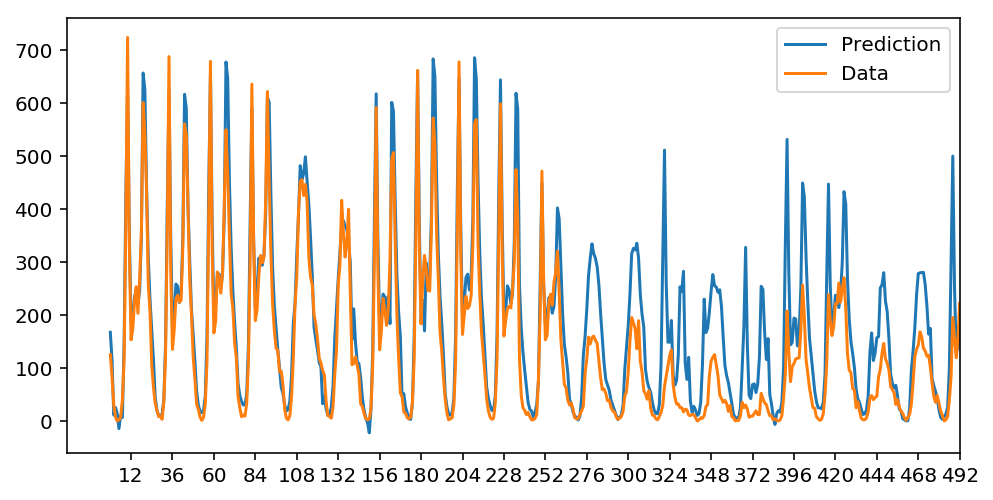

In [45]:
fig,ax=plt.subplots(figsize=(8,4))
mean,std=scaled_feature['cnt']
predictions=model.predict(test_features.values).T*std+mean
ax.plot(predictions[0],label='Prediction')
ax.plot((test_targets['cnt']*std+mean).values,label='Data')
ax.set_xlim(right=len (predictions))
ax.legend()

dates=pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates=dates.apply(lambda d:d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
#_=ax.set_xticklabels(dates[12::24],rotations=45)